In [1]:
!pip install -q unsloth wandb Pillow

In [2]:
from unsloth import FastVisionModel
import torch
from PIL import Image, ExifTags

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


Skipping import of cpp extensions due to incompatible torch version 2.8.0+cu128 for torchao version 0.14.0         Please see GitHub issue #2919 for more info


🦥 Unsloth Zoo will now patch everything to make training faster!


/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [ ]:
model, tokenizer = FastVisionModel.from_pretrained(
    #"unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    "unsloth/Qwen2.5-VL-7B-Instruct-unsloth-bnb-4bit",
    #"unsloth/medgemma-4b-it-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

INFO:unsloth_zoo.log: Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.
INFO:unsloth_zoo.log: Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.
INFO:unsloth_zoo.log: Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.
INFO:unsloth_zoo.log: Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.
INFO:unsloth_zoo.log: Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.
INFO:unsloth_zoo.log: Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.
INFO:unsloth_zoo.log: Unsloth: We'll be using `/tmp/unsloth_compiled_cache` for temporary Unsloth patches.


==((====))==  Unsloth 2025.10.3: Fast Gemma3 patching. Transformers: 4.56.2.
   \\   /|    NVIDIA RTX A5000. Num GPUs = 1. Max memory: 23.573 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu128. CUDA: 8.6. CUDA Toolkit: 12.8. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Gemma3 does not support SDPA - switching to fast eager.


model.safetensors:   0%|          | 0.00/4.56G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # 비전 인코더 레이어
    finetune_language_layers   = True, # 언어 모델 레이어
    finetune_attention_modules = True, # 어텐션 모듈
    finetune_mlp_modules       = True, #  MLP 모듈

    r = 128,           # LoRA rank (높을수록 정확도 향상 가능, 과적합 위험)
    lora_alpha = 128,  # LoRA 스케일링 파라미터 (보통 r과 같거나 더 크게)
    lora_dropout = 0,  # 드롭아웃 비활성화
    bias = "none",     # bias 파라미터 학습 안 함
    random_state = 1234, # 재현성을 위한 랜덤 시드, 동일한 시드로 실행하면 동일한 결과 출력됨.
    use_rslora = False,  # Rank Stabilized LoRA 사용 여부, False면 일반 LoRA를 사용하고 RSLoRA는 학습 안정성을 높이는 변형 LoRA임.
    loftq_config = None, # LoftQ(LoRA Fine-Tuning-aware Quantization) 설정, None이면 양자화를 사용하지 않음. LoftQ는 양자화된 모델에 LoRA를 적용할 때 성능 저하를 줄이는 기법
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `base_model.model.model.vision_tower.vision_model` require gradients


In [ ]:
# HuggingFace 로그인 (토큰은 환경변수 또는 대화형 입력 사용)
# 방법 1: 환경변수 사용
# export HF_TOKEN=your_token_here
# !huggingface-cli login --token $HF_TOKEN

# 방법 2: 대화형 로그인 (추천)
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `hf`CLI if you want to set the git credential as well.
Token is valid (permission: write).
The token `finetuning` has been saved to /workspace/.cache/huggingface/stored_tokens
Your token has been saved to /workspace/.cache/huggingface/token
Login successful.
The current active token is: `finetuning`


In [ ]:
from datasets import load_dataset
import os

# HuggingFace 데이터셋 이름 설정
# 본인의 데이터셋 이름으로 변경하세요
# 형식: "your-username/your-dataset-name"
HF_DATASET_NAME = os.getenv("HF_DATASET_NAME", "your-username/your-dataset-name")

dataset = load_dataset(HF_DATASET_NAME)

README.md:   0%|          | 0.00/498 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

data/train-00000-of-00019.parquet:   0%|          | 0.00/780M [00:00<?, ?B/s]

data/train-00001-of-00019.parquet:   0%|          | 0.00/539M [00:00<?, ?B/s]

data/train-00002-of-00019.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

data/train-00003-of-00019.parquet:   0%|          | 0.00/613M [00:00<?, ?B/s]

data/train-00004-of-00019.parquet:   0%|          | 0.00/614M [00:00<?, ?B/s]

data/train-00005-of-00019.parquet:   0%|          | 0.00/253M [00:00<?, ?B/s]

data/train-00006-of-00019.parquet:   0%|          | 0.00/583M [00:00<?, ?B/s]

data/train-00007-of-00019.parquet:   0%|          | 0.00/682M [00:00<?, ?B/s]

data/train-00008-of-00019.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

data/train-00009-of-00019.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

data/train-00010-of-00019.parquet:   0%|          | 0.00/702M [00:00<?, ?B/s]

data/train-00011-of-00019.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

data/train-00012-of-00019.parquet:   0%|          | 0.00/403M [00:00<?, ?B/s]

data/train-00013-of-00019.parquet:   0%|          | 0.00/754M [00:00<?, ?B/s]

data/train-00014-of-00019.parquet:   0%|          | 0.00/371M [00:00<?, ?B/s]

data/train-00015-of-00019.parquet:   0%|          | 0.00/343M [00:00<?, ?B/s]

data/train-00016-of-00019.parquet:   0%|          | 0.00/742M [00:00<?, ?B/s]

data/train-00017-of-00019.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

data/train-00018-of-00019.parquet:   0%|          | 0.00/268M [00:00<?, ?B/s]

data/test-00000-of-00003.parquet:   0%|          | 0.00/404M [00:00<?, ?B/s]

data/test-00001-of-00003.parquet:   0%|          | 0.00/385M [00:00<?, ?B/s]

data/test-00002-of-00003.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9600 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1200 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
dataset

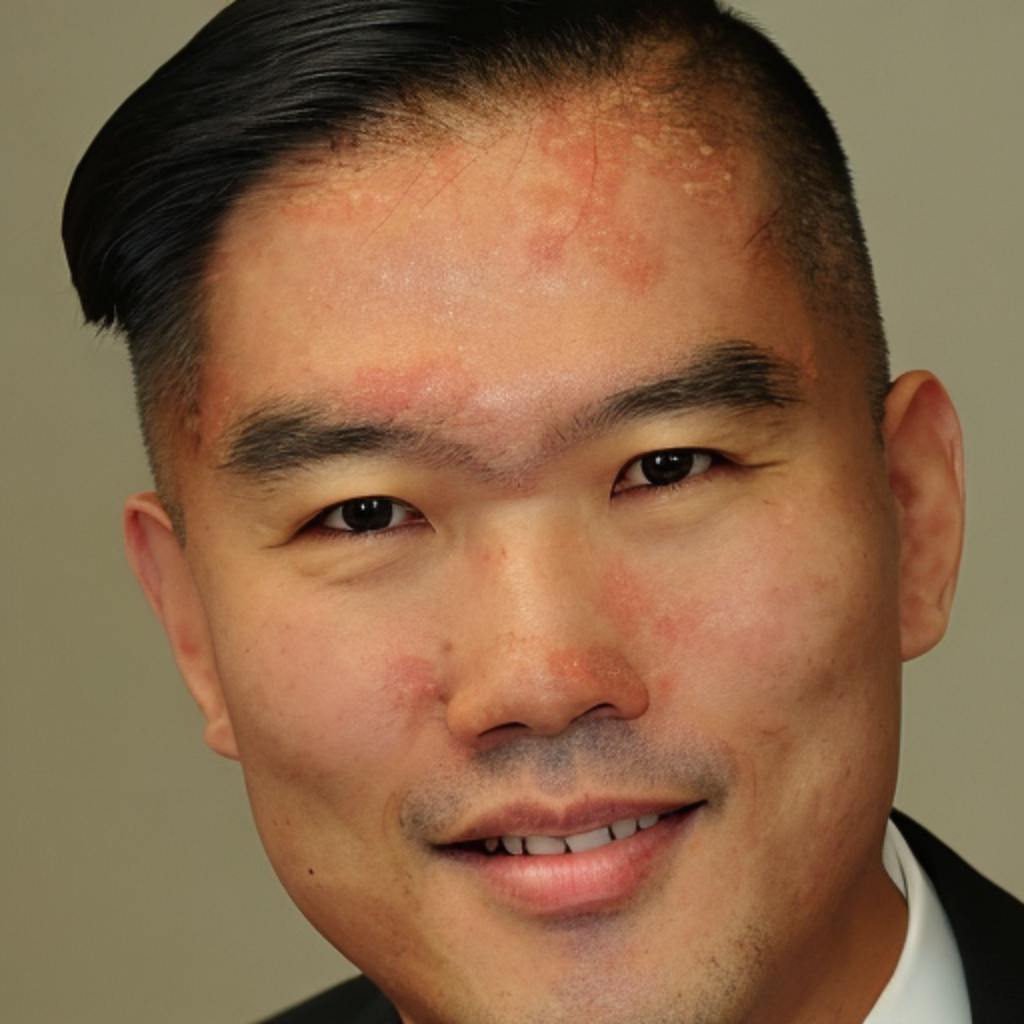

In [7]:
dataset['train'][0]["image"]

In [8]:
dataset['train'][0]["output"]

'<label>건선</label>\n<summary>이미지에서 이마와 양쪽 뺨에 홍반성 판이 관찰됩니다. 병변은 두꺼운 은백색 인설이 층을 이루고 있으며, 경계가 매우 명확하고 뚜렷합니다. 주변 정상 피부와의 구분이 확연하여 건선의 전형적인 특징입니다. 피부 표면은 거칠고 건조한 상태로 보이며, 대칭적으로 분포된 양상이 눈에 띕니다. 병변의 크기와 형태가 다양하고, 특히 이마 부위에서 더 두드러진 경향이 있습니다. 이러한 관찰은 건선의 임상적 소견과 잘 일치합니다.</summary>'

In [9]:
instruction = """
너는 안면부 피부 질환을 분석하는 전문 AI이다. 
주어진 얼굴 부위 피부 이미지를 관찰하고, 이미지에서 보이는 임상적 특징을 자세히 설명하라.

**중요 지침:**
- 다음 피부 질환 목록 중 가장 두드러진 주된 질환 1개를 <label>에 명시하라
- summary에서 동반 가능한 다른 질환의 소견이 있다면 함께 언급할 수 있다
- 3문장 이내로 간결하면서도 핵심적인 정보를 담아라. 같은 표현 반복을 피하라
- 과도한 추측보다는 이미지에서 관찰 가능한 객관적 소견 및 특징에 근거하여 기술하라

다음은 진단 가능한 피부 질환 목록과 각 질환의 임상적 특징이다:

**0: 건선 (Psoriasis)**
- 병변 형태: 은백색 인설이 쌓인 붉은 구진이나 판
- 경계: 매우 명확하고 뚜렷함
- 안면 발생: 이마, 헤어라인, 귀 주변에서 관찰 가능
- 핵심 특징: 두꺼운 은백색 인설, 명확한 경계, 대칭적 분포
- 증상: 가려움증 동반 가능

**1: 아토피 피부염 (Atopic Dermatitis)**
- 병변 형태: 건조하고 가려운 습진성 병변, 태선화
- 경계: 불명확
- 안면 발생: 얼굴 전반, 특히 뺨, 이마, 눈 주위
- 핵심 특징: 피부 건조, 긁은 자국, 만성 재발성
- 증상: 심한 가려움증

**2: 여드름 (Acne)**
- 병변 형태: 면포(comedone), 구진, 농포, 낭종
- 경계: 개별 병변은 명확
- 안면 발생: 이마, 코, 턱 등 T존 중심, 뺨에도 가능
- 핵심 특징: 다양한 병변 동시 존재, 피지선 분포 부위
- 증상: 염증성 병변은 통증 가능

**3: 주사 (Rosacea)**
- 병변 형태: 지속적인 홍반, 모세혈관 확장, 구진, 농포
- 경계: 불명확한 홍반
- 안면 발생: 얼굴 중앙부(코, 뺨 중심, 이마)
- 핵심 특징: 안면 홍조, 혈관 확장 두드러짐, 딸기코 가능
- 증상: 작열감, 따끔거림

**4: 지루 피부염 (Seborrheic Dermatitis)**
- 병변 형태: 기름기 있는 노란 비늘과 홍반
- 경계: 비교적 명확
- 안면 발생: 눈썹, 비구순 주름, 귀 주변, 헤어라인
- 핵심 특징: 기름진 각질, 피지선이 많은 부위
- 증상: 가려움증, 각질

**5: 정상 (Normal)**
- 특징: 특별한 병변이 관찰되지 않음
- 피부 상태: 건강한 피부 톤과 질감

---

**답변 형식:**
<label>{질병명}</label>
<summary>{이미지에서 관찰되는 구체적 소견을 자세히 기술. 병변의 색상, 형태, 경계, 분포, 크기 등을 포함하여 해당 질환의 특징적 소견임을 설명.}</summary>

**예시 1:**
<label>건선</label>
<summary>이미지에서는 이마와 헤어라인 부위에 홍반성 판이 관찰되며, 그 위로 은백색의 두꺼운 인설이 층을 이루어 쌓여있습니다. 병변의 경계가 매우 명확하여 주변 정상 피부와 뚜렷하게 구분됩니다. 인설의 두께와 은백색 광택, 명확한 경계는 건선의 전형적인 임상 양상입니다.</summary>

**예시 2:**
<label>여드름</label>
<summary>이미지에서는 얼굴의 이마와 뺨 부위에 다수의 홍반성 구진과 농포가 관찰됩니다. 일부 병변은 중심부에 화농성 내용물이 있으며, 면포도 함께 보입니다. 피지선이 발달한 안면부에 염증성 병변과 비염증성 병변이 혼재된 양상은 심상성 여드름의 특징적 소견입니다.</summary>

**예시 3:**
<label>정상</label>
<summary>이미지에서는 특별한 병변이나 이상 소견이 관찰되지 않습니다. 피부 톤이 균일하고 질감이 매끄러우며, 홍반, 구진, 인설 등의 병적 변화가 없습니다. 건강한 정상 피부 상태를 보이고 있습니다.</summary>

**특수 상황:**
- 얼굴 부위가 아닌 이미지이거나, 이미지 품질이 매우 불량하여 판단이 불가능한 경우:
<label>진단불가</label>
<summary>제공된 이미지는 얼굴 부위가 아니거나 이미지 품질이 불량하여 피부 질환을 판단할 수 없습니다.</summary>
"""

In [10]:
dataset = dataset.shuffle(seed=1234)

In [11]:
def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["output"]} ]
        },
    ]
    return { "messages" : conversation }
pass

In [12]:
converted_test_dataset = [convert_to_conversation(sample) for sample in dataset["test"]]
converted_train_dataset = [convert_to_conversation(sample) for sample in dataset["train"]]

In [13]:
converted_test_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': '\n너는 안면부 피부 질환을 분석하는 전문 AI이다. \n주어진 얼굴 부위 피부 이미지를 관찰하고, 이미지에서 보이는 임상적 특징을 자세히 설명하라.\n\n**중요 지침:**\n- 다음 피부 질환 목록 중 가장 두드러진 주된 질환 1개를 <label>에 명시하라\n- summary에서 동반 가능한 다른 질환의 소견이 있다면 함께 언급할 수 있다\n- 3문장 이내로 간결하면서도 핵심적인 정보를 담아라. 같은 표현 반복을 피하라\n- 과도한 추측보다는 이미지에서 관찰 가능한 객관적 소견 및 특징에 근거하여 기술하라\n\n다음은 진단 가능한 피부 질환 목록과 각 질환의 임상적 특징이다:\n\n**0: 건선 (Psoriasis)**\n- 병변 형태: 은백색 인설이 쌓인 붉은 구진이나 판\n- 경계: 매우 명확하고 뚜렷함\n- 안면 발생: 이마, 헤어라인, 귀 주변에서 관찰 가능\n- 핵심 특징: 두꺼운 은백색 인설, 명확한 경계, 대칭적 분포\n- 증상: 가려움증 동반 가능\n\n**1: 아토피 피부염 (Atopic Dermatitis)**\n- 병변 형태: 건조하고 가려운 습진성 병변, 태선화\n- 경계: 불명확\n- 안면 발생: 얼굴 전반, 특히 뺨, 이마, 눈 주위\n- 핵심 특징: 피부 건조, 긁은 자국, 만성 재발성\n- 증상: 심한 가려움증\n\n**2: 여드름 (Acne)**\n- 병변 형태: 면포(comedone), 구진, 농포, 낭종\n- 경계: 개별 병변은 명확\n- 안면 발생: 이마, 코, 턱 등 T존 중심, 뺨에도 가능\n- 핵심 특징: 다양한 병변 동시 존재, 피지선 분포 부위\n- 증상: 염증성 병변은 통증 가능\n\n**3: 주사 (Rosacea)**\n- 병변 형태: 지속적인 홍반, 모세혈관 확장, 구진, 농포\n- 경계: 불명확한 홍반\n- 안면 발생: 얼굴 중앙부(코, 뺨 중심, 이마)\n- 핵심 특

In [ ]:
import wandb
import os

# WandB 로그인
# 방법 1: 환경변수 사용 (추천)
# export WANDB_API_KEY=your_key_here
# wandb.login()

# 방법 2: 대화형 로그인
wandb.login()

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ashash (ashash-himedia) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# WandB 프로젝트 설정
# 본인의 WandB 프로젝트명과 실행 이름으로 변경하세요
wandb.init(
    project="your-project-name",     # 필수: 본인의 WandB 프로젝트명
    name="your-run-name",            # 선택: 실행 이름 (예: "finetuning-run-1")
    config={
        "learning_rate": 5e-5,
        "rank": 128,
        "batch_size": 8
    }
)

wandb: Detected [huggingface_hub.inference] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/


In [16]:
txt = tokenizer.apply_chat_template(converted_test_dataset[0]["messages"], tokenize=False, add_generation_prompt=False)
print(txt)

<bos><start_of_turn>user
너는 안면부 피부 질환을 분석하는 전문 AI이다. 
주어진 얼굴 부위 피부 이미지를 관찰하고, 이미지에서 보이는 임상적 특징을 자세히 설명하라.

**중요 지침:**
- 다음 피부 질환 목록 중 가장 두드러진 주된 질환 1개를 <label>에 명시하라
- summary에서 동반 가능한 다른 질환의 소견이 있다면 함께 언급할 수 있다
- 3문장 이내로 간결하면서도 핵심적인 정보를 담아라. 같은 표현 반복을 피하라
- 과도한 추측보다는 이미지에서 관찰 가능한 객관적 소견 및 특징에 근거하여 기술하라

다음은 진단 가능한 피부 질환 목록과 각 질환의 임상적 특징이다:

**0: 건선 (Psoriasis)**
- 병변 형태: 은백색 인설이 쌓인 붉은 구진이나 판
- 경계: 매우 명확하고 뚜렷함
- 안면 발생: 이마, 헤어라인, 귀 주변에서 관찰 가능
- 핵심 특징: 두꺼운 은백색 인설, 명확한 경계, 대칭적 분포
- 증상: 가려움증 동반 가능

**1: 아토피 피부염 (Atopic Dermatitis)**
- 병변 형태: 건조하고 가려운 습진성 병변, 태선화
- 경계: 불명확
- 안면 발생: 얼굴 전반, 특히 뺨, 이마, 눈 주위
- 핵심 특징: 피부 건조, 긁은 자국, 만성 재발성
- 증상: 심한 가려움증

**2: 여드름 (Acne)**
- 병변 형태: 면포(comedone), 구진, 농포, 낭종
- 경계: 개별 병변은 명확
- 안면 발생: 이마, 코, 턱 등 T존 중심, 뺨에도 가능
- 핵심 특징: 다양한 병변 동시 존재, 피지선 분포 부위
- 증상: 염증성 병변은 통증 가능

**3: 주사 (Rosacea)**
- 병변 형태: 지속적인 홍반, 모세혈관 확장, 구진, 농포
- 경계: 불명확한 홍반
- 안면 발생: 얼굴 중앙부(코, 뺨 중심, 이마)
- 핵심 특징: 안면 홍조, 혈관 확장 두드러짐, 딸기코 가능
- 증상: 작열감, 따끔거림

**4: 지루 피부염 (Seborrheic Dermatitis)**
- 병변 형

In [17]:
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(
                                            model,
                                            tokenizer,
                                            train_on_responses_only = True,
                                            max_seq_length = 4096,
                                            instruction_part = "<start_of_turn>user\n",
                                            response_part = "<start_of_turn>model\n",
                                        ), # Must use!
    train_dataset = converted_train_dataset,
    eval_dataset = converted_test_dataset[:64],
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 3000,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 5e-5,
        logging_steps = 1,
        eval_strategy ="steps",
        eval_on_start=True,
        eval_steps=50,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "cosine",
        seed = 1234,
        output_dir = "outputs",
        report_to = "wandb",     # For Weights and Biases
        save_total_limit = 3,
        max_grad_norm=5.0,

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
    ),
)

In [19]:
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 9,600 | Num Epochs = 3 | Total steps = 3,000
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 307,982,336 of 4,608,061,808 (6.68% trained)


Step,Training Loss,Validation Loss
0,No log,0.747741
50,0.638100,0.790989
100,0.666900,0.789361
150,0.700300,0.793259
200,0.746900,0.791121
250,0.748200,0.785594
300,0.817700,0.782654
350,0.784200,0.779614
400,0.749700,0.788153
450,0.710700,0.785372


KeyboardInterrupt: 